# Multiple Linear Regression

In this notebook, we extend **simple linear regression** to **multiple linear regression**.

Instead of using one feature, we now use multiple features to predict a target variable.

The model is defined as:

y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b


## Goals

- Understand why multiple features are useful
- Train a multiple linear regression model
- Interpret model coefficients


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

We use a dataset related to student performance.

Features:
- study_hours
- attendance_rate
- previous_gpa

Target:
- final_score


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("datasets/students_scores.csv")
df

,study_hours,attendance_rate,previous_gpa,final_score
0,5,70,14.0,13.0
1,6,75,14.5,14.0
2,7,80,15.0,15.0
3,8,85,15.5,16.0
4,9,90,16.0,17.0
5,10,95,16.5,18.0
6,11,96,17.0,18.5
7,12,98,17.5,19.0
8,13,99,18.0,19.5
9,14,100,18.5,20.0


We separate the dataset into:
- X → input features
- y → target variable

In [4]:
X = df[["study_hours", "attendance_rate", "previous_gpa"]]
y = df["final_score"]

Now we train a **Multiple Linear Regression** model using scikit-learn.

In [5]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


After training, the model learns:
- A coefficient for each feature
- An intercept


In [6]:
coefficients = pd.Series(
    model.coef_,
    index=X.columns
)

coefficients

study_hours        0.261030
attendance_rate    0.134563
previous_gpa       0.130515
dtype: float64

In [7]:
model.intercept_

np.float64(0.45017114495977495)

Each coefficient shows how much the final score changes
when the corresponding feature increases by one unit,
assuming other features remain constant.

We now use the trained model to make predictions.

In [8]:
y_pred = model.predict(X)

In [9]:
mse = mean_squared_error(y, y_pred)
mse

0.0005455245593017241

We compare actual values with predicted values.

In [10]:
comparison = pd.DataFrame({
    "Actual": y,
    "Predicted": y_pred
})

comparison

,Actual,Predicted
0,13.0,13.001925
1,14.0,14.001027
2,15.0,15.000128
3,16.0,15.999230
4,17.0,16.998331
5,18.0,17.997433
6,18.5,18.458283
7,19.0,19.053697
8,19.5,19.514547
9,20.0,19.975398


We visualize the prediction error.

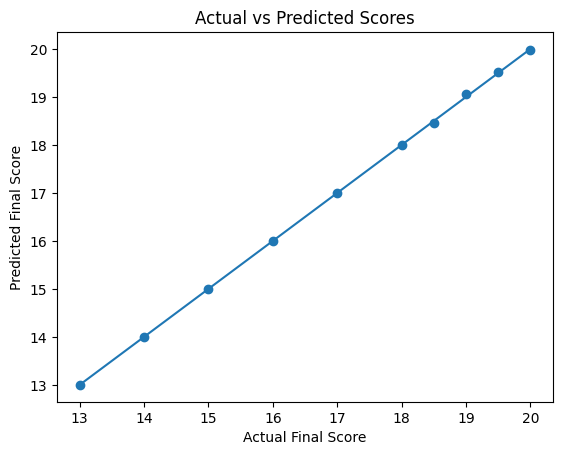

In [11]:
plt.scatter(y, y_pred)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()

If the model is perfect, all points lie on the diagonal line.

Deviations from the line represent prediction errors.